# Kernel Trick K-means with Synthetic Data

- author: Virginia Ordoño Bernier
- date: May 2024

Tareas:
- Dibuja los datos
- Aplicar K-means "a secas", no funcionará
- Después aplica el truco del núcleo a ver qué pasa.
- Y después usa DBSCAN y DBPC a ver qué pasa..

## 1. Carga datos VSC

In [1]:
import pandas as pd # type: ignore

data4  = '../data/synthetic_data4.csv'
df = pd.read_csv(data4)

df.T

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
X1,0.682988,2.040990,-0.139752,0.885748,1.182459,1.019208,0.389362,-0.560385,0.901844,0.206748,...,-0.210542,0.671639,-1.007023,1.868065,1.018855,0.385833,0.202356,-0.661774,1.666161,-0.466028
X2,-0.345203,-0.131615,0.454391,0.286342,-0.497711,-0.425466,-0.247117,0.712681,0.053931,0.006208,...,1.018729,-0.382645,0.671079,0.477375,0.421264,-0.156333,1.103499,0.850728,-0.079847,0.849944
Cluster,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000


## 1. Carga de datos Collab

In [274]:
# from google.colab import drive
# drive.mount('/content/drive')

# #!pip install pydpc
# import pandas as pd

# data4 = '/content/drive/MyDrive/Colab Notebooks/SAA/data/synthetic_data4.csv'
# df = pd.read_csv(data4)

# df.T

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
X1,0.682988,2.040990,-0.139752,0.885748,1.182459,1.019208,0.389362,-0.560385,0.901844,0.206748,...,-0.210542,0.671639,-1.007023,1.868065,1.018855,0.385833,0.202356,-0.661774,1.666161,-0.466028
X2,-0.345203,-0.131615,0.454391,0.286342,-0.497711,-0.425466,-0.247117,0.712681,0.053931,0.006208,...,1.018729,-0.382645,0.671079,0.477375,0.421264,-0.156333,1.103499,0.850728,-0.079847,0.849944
Cluster,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000


## 2. Visualización de los datos

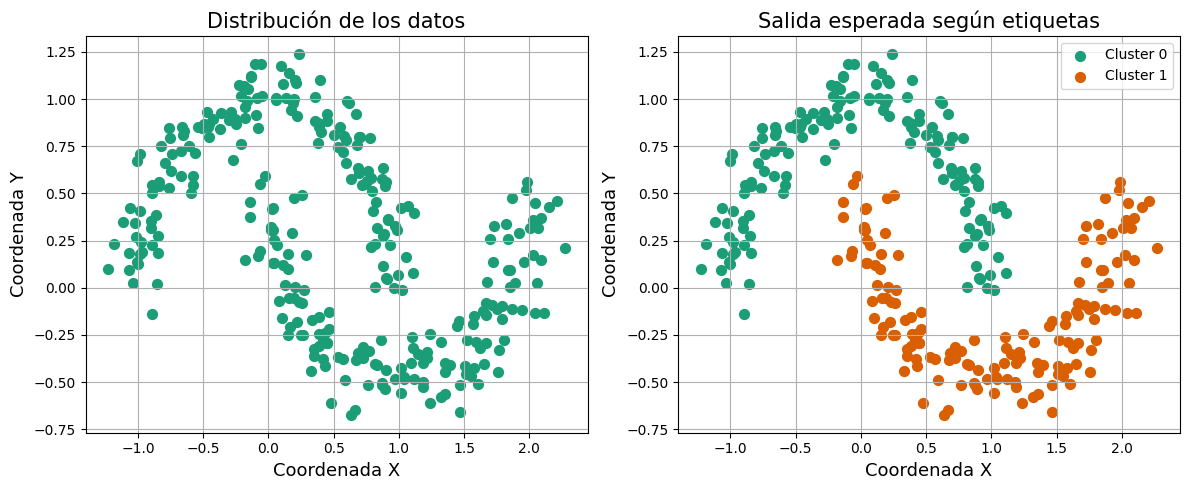

In [275]:
import matplotlib.pyplot as plt # type: ignore

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = plt.colormaps['Dark2']

# Gráfico 1. Distribución de los datos
# Dibujar todos los puntos con el mismo color
ax1.scatter(df['X1'], df['X2'], s=50, color=colors(0))
ax1.set_xlabel('Coordenada X', fontsize=13)
ax1.set_ylabel('Coordenada Y', fontsize=13)
ax1.set_title('Distribución de los datos', fontsize=15)
ax1.grid(True)

# Gráfico 2. Datos con etiquetas de cluster
# Obtener las etiquetas únicas de los clusters
unique_labels = set(df.Cluster)

# Bucle para asignar un color a cada cluster.
for i, label in enumerate(unique_labels):
    # True/False según si el valor en la columna 'Cluster' es igual o no al valor de 'label'
    cluster_mask = df.Cluster == label
    # Selecciona las filas donde el valor de 'Cluster' sea igual al de 'label' y lo representa del mismo color
    ax2.scatter(df.X1[cluster_mask], df.X2[cluster_mask], s=50, color=colors(i), label=f'Cluster {label}')

ax2.set_xlabel('Coordenada X', fontsize=13)
ax2.set_ylabel('Coordenada Y', fontsize=13)
ax2.set_title('Salida esperada según etiquetas', fontsize=15)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## 3. K-means

### 3.1. Construcción K-means

In [276]:
from sklearn.cluster import KMeans # type: ignore

RANDOM_SEED = 100
K = 2
N_INIT = 10

model = KMeans(n_clusters=K, n_init=N_INIT, random_state=RANDOM_SEED)
groups = model.fit_predict(df[['X1', 'X2']])
centroids = model.cluster_centers_

### 3.2. Visualización Kmeans vs Gráfico Esperado

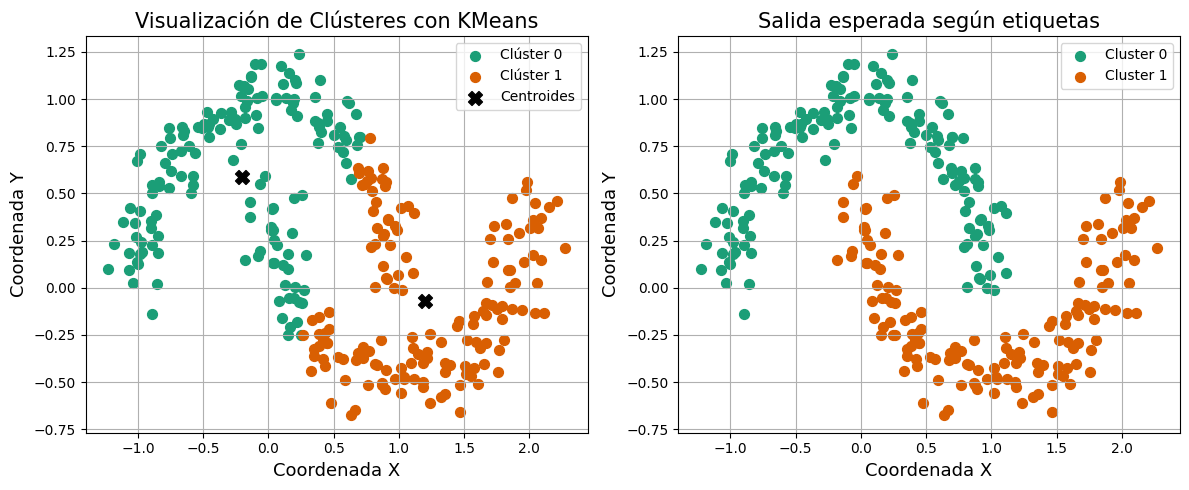

In [277]:
import matplotlib.pyplot as plt # type: ignore

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = plt.colormaps['Dark2']

# Gráfico 1. K-means
for i in range(len(centroids)):
  # True/False según si el valor de 'groups' es igual o no al valor de 'i'
    cluster_mask = groups == i
    ax1.scatter(df.X1[cluster_mask], df.X2[cluster_mask], label=f'Clúster {i}', color=colors(i), s=50)

# Mostrar los centroides
ax1.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='black', s=100, label='Centroides')

# Etiquetas y título
ax1.set_xlabel('Coordenada X', fontsize=13)
ax1.set_ylabel('Coordenada Y', fontsize=13)
ax1.set_title('Visualización de Clústeres con KMeans', fontsize=15)
ax1.legend()
ax1.grid(True)

# Gráfico 2. Datos con etiquetas de cluster
# Obtener las etiquetas únicas de los clusters
unique_labels = set(df.Cluster)

# Bucle para asignar un color a cada cluster.
for i, label in enumerate(unique_labels):
    # True/False según si el valor en la columna 'Cluster' es igual o no al valor de 'label'
    cluster_mask = df.Cluster == label
    # Selecciona las filas donde el valor de 'Cluster' sea igual al de 'label' y lo representa del mismo color
    ax2.scatter(df.X1[cluster_mask], df.X2[cluster_mask], color=colors(i), label=f'Cluster {label}', s=50)

ax2.set_xlabel('Coordenada X', fontsize=13)
ax2.set_ylabel('Coordenada Y', fontsize=13)
ax2.set_title('Salida esperada según etiquetas', fontsize=15)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## 4. K-means con truco del núcleo

### 4.1. Creación de la matriz de Gram

Matriz de similitud que describe las relaciones entre los puntos de datos en un espacio de características transformado por un kernel específico.

In [278]:
from sklearn.metrics.pairwise import rbf_kernel # type: ignore
gram_matrix = rbf_kernel(df, gamma=1)

gram_matrix

array([[1.00000000e+00, 1.51103521e-01, 2.68138660e-01, ...,
        1.44272492e-02, 3.54501574e-01, 2.35503230e-02],
       [1.51103521e-01, 1.00000000e+00, 6.10261675e-03, ...,
        9.42148849e-05, 8.66600496e-01, 2.61624523e-04],
       [2.68138660e-01, 6.10261675e-03, 1.00000000e+00, ...,
        2.39406904e-01, 2.88187629e-02, 2.82827261e-01],
       ...,
       [1.44272492e-02, 9.42148849e-05, 2.39406904e-01, ...,
        1.00000000e+00, 6.85577438e-04, 9.62407811e-01],
       [3.54501574e-01, 8.66600496e-01, 2.88187629e-02, ...,
        6.85577438e-04, 1.00000000e+00, 1.64380653e-03],
       [2.35503230e-02, 2.61624523e-04, 2.82827261e-01, ...,
        9.62407811e-01, 1.64380653e-03, 1.00000000e+00]])

### 4.2. Construcción del modelo

In [279]:
from sklearn.cluster import KMeans # type: ignore

model = KMeans(n_clusters=K, random_state=RANDOM_SEED, n_init=N_INIT)
groups = model.fit_predict(gram_matrix)
centroids = model.cluster_centers_

### 4.3. Visualización del Kmeans con truco vs Gráfico Esperado

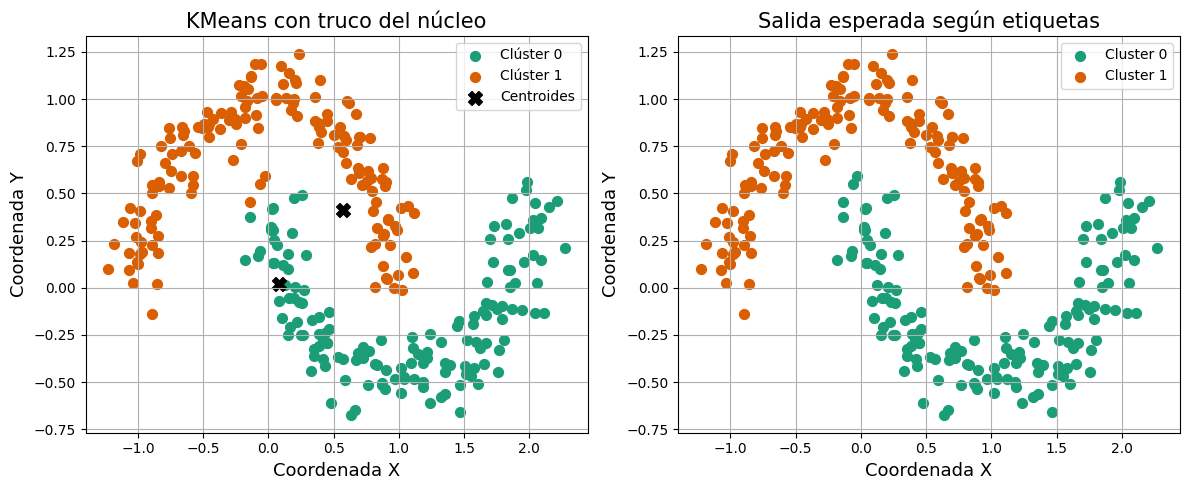

In [280]:
import matplotlib.pyplot as plt # type: ignore

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = plt.colormaps['Dark2']

# Gráfico 1. Kmeans con truco de núcleo
for i in range(len(centroids)):
    # True/False según si el valor de 'groups' es igual o no al valor de 'i'
    cluster_mask = groups == i
    ax1.scatter(df.X1[cluster_mask], df.X2[cluster_mask], label=f'Clúster {i}', color=colors(i), s=50)

# Mostrar los centroides
ax1.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='black', s=100, label='Centroides')

# Etiquetas y título
ax1.set_xlabel('Coordenada X', fontsize=13)
ax1.set_ylabel('Coordenada Y', fontsize=13)
ax1.set_title('KMeans con truco del núcleo', fontsize=15)
ax1.legend()
ax1.grid(True)

# Gráfico 2. Datos con etiquetas de cluster
# Invertir valores de Cluster para que luego coincidan los colores en la visualización
df['Cluster'] = df['Cluster'].replace({0: 1, 1: 0})
# Obtener las etiquetas únicas de los clusters
unique_labels = set(df.Cluster)

# Bucle para asignar un color a cada cluster.
for i, label in enumerate(unique_labels):
    # True/False según si el valor en la columna 'Cluster' es igual o no al valor de 'label'
    cluster_mask = df.Cluster == label
    # Selecciona las filas donde el valor de 'Cluster' sea igual al de 'label' y lo representa del mismo color
    ax2.scatter(df.X1[cluster_mask], df.X2[cluster_mask], color=colors(i), label=f'Cluster {label}', s=50)

ax2.set_xlabel('Coordenada X', fontsize=13)
ax2.set_ylabel('Coordenada Y', fontsize=13)
ax2.set_title('Salida esperada según etiquetas', fontsize=15)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


## 5. DBSCAN

### 5.1. Selección de hiperparámetros

In [281]:
from sklearn.cluster import DBSCAN # type: ignore

# Definir una lista de posibles valores de EPSILON y MIN_SAMPLES para probar
possible_eps_values = [0.1, 0.2]
possible_min_samples_values = [1, 2, 3]

for eps in possible_eps_values:
    for min_samples in possible_min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df[['X1', 'X2']])
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"For EPSILON={eps} and MIN_SAMPLES={min_samples}, Number of clusters: {n_clusters}")

For EPSILON=0.1 and MIN_SAMPLES=1, Number of clusters: 52
For EPSILON=0.1 and MIN_SAMPLES=2, Number of clusters: 26
For EPSILON=0.1 and MIN_SAMPLES=3, Number of clusters: 16
For EPSILON=0.2 and MIN_SAMPLES=1, Number of clusters: 2
For EPSILON=0.2 and MIN_SAMPLES=2, Number of clusters: 2
For EPSILON=0.2 and MIN_SAMPLES=3, Number of clusters: 2


### 5.2. Creación del modelo

In [282]:
from sklearn.cluster import DBSCAN # type: ignore
import matplotlib.pyplot as plt # type: ignore

BEST_EPSILON = 0.2
BEST_MIN_SAMPLES = 1

dbscan_model = DBSCAN(eps=BEST_EPSILON, min_samples=BEST_MIN_SAMPLES)

# Ajustar DBSCAN a tus datos y obtener las etiquetas de cluster
labels = dbscan_model.fit_predict(df[['X1', 'X2']])

# Contar la cantidad de outliers (puntos con etiqueta -1)
total_outliers = sum(labels == -1)

# Contar el número de etiquetas únicas (clusters) excluyendo los outliers (etiqueta -1)
# Se excluye la etiqueta -1 porque representa outliers
unique_labels = set(labels)
total_clusters = len(unique_labels) - 1 if -1 in unique_labels else len(unique_labels)

print(f"El total de clusters detectados: {total_clusters}")
print(f"La cantidad de outliers detectados por DBSCAN es: {total_outliers}")

El total de clusters detectados: 2
La cantidad de outliers detectados por DBSCAN es: 0


### 5.3 Visualización DBSCAN  vs Gráfico Esperado

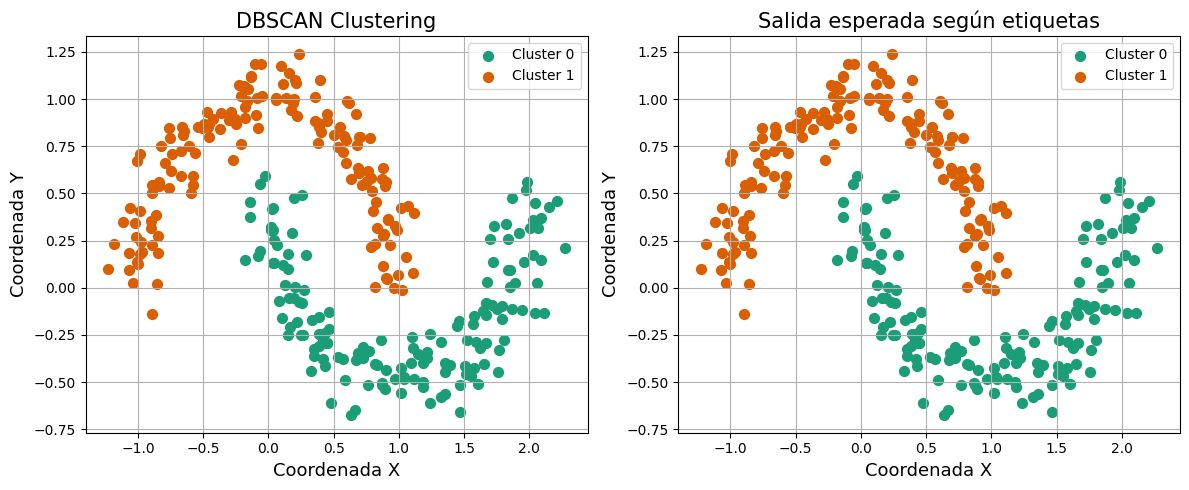

In [283]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = plt.colormaps['Dark2']


# Gráfico 1. DBSCAN
for i, label in enumerate(unique_labels):
    cluster_mask = (labels == label)
    ax1.scatter(df.loc[cluster_mask, "X1"], df.loc[cluster_mask, "X2"], color=colors(i), label=f'Cluster {label}', s=50)

ax1.set_title("DBSCAN Clustering", fontsize=15)
ax1.set_xlabel('Coordenada X', fontsize=13)
ax1.set_ylabel('Coordenada Y', fontsize=13)
ax1.grid()
ax1.legend()

# Gráfico 2. Datos con etiquetas de cluster
# Obtener las etiquetas únicas de los clusters
unique_labels = set(df.Cluster)

# Bucle para asignar un color a cada cluster.
for i, label in enumerate(unique_labels):
    # True/False según si el valor en la columna 'Cluster' es igual o no al valor de 'label'
    cluster_mask = df.Cluster == label
    # Selecciona las filas donde el valor de 'Cluster' sea igual al de 'label' y lo representa del mismo color
    ax2.scatter(df.X1[cluster_mask], df.X2[cluster_mask], color=colors(i), label=f'Cluster {label}', s=50)

ax2.set_xlabel('Coordenada X', fontsize=13)
ax2.set_ylabel('Coordenada Y', fontsize=13)
ax2.set_title('Salida esperada según etiquetas', fontsize=15)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


## 6. DPC

### 6.1. Inicialización del algoritmo

- Calcula las densidades y las distancias mínimas entre puntos

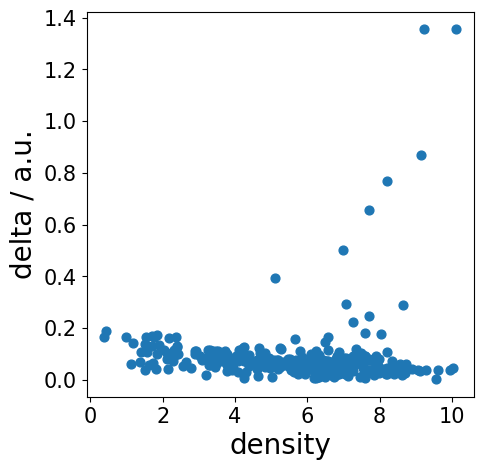

In [284]:
import pydpc # type: ignore
import numpy as np # type: ignore

# Convertir DataFrame a un array de numpy
dpc_numpy = df[['X1', 'X2']].to_numpy()
dpc_cluster = pydpc.Cluster(np.ascontiguousarray(dpc_numpy))

### 6.2. Establecer valores de hiperparámetros

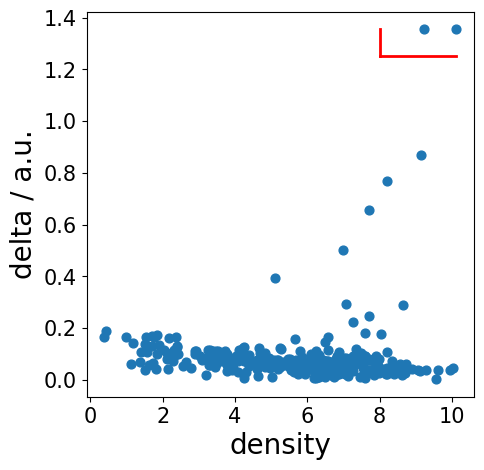

In [285]:
# Definimos los valores rho y delta que nos permiten elegir los centros
np.bool = bool
RHO = 8
DELTA = 1.25
dpc_cluster.assign(RHO, DELTA)

### 6.3. Visualización del modelo vs. Datos etiquetados

In [286]:
cluster_centers = dpc_cluster.clusters
labels = dpc_cluster.membership

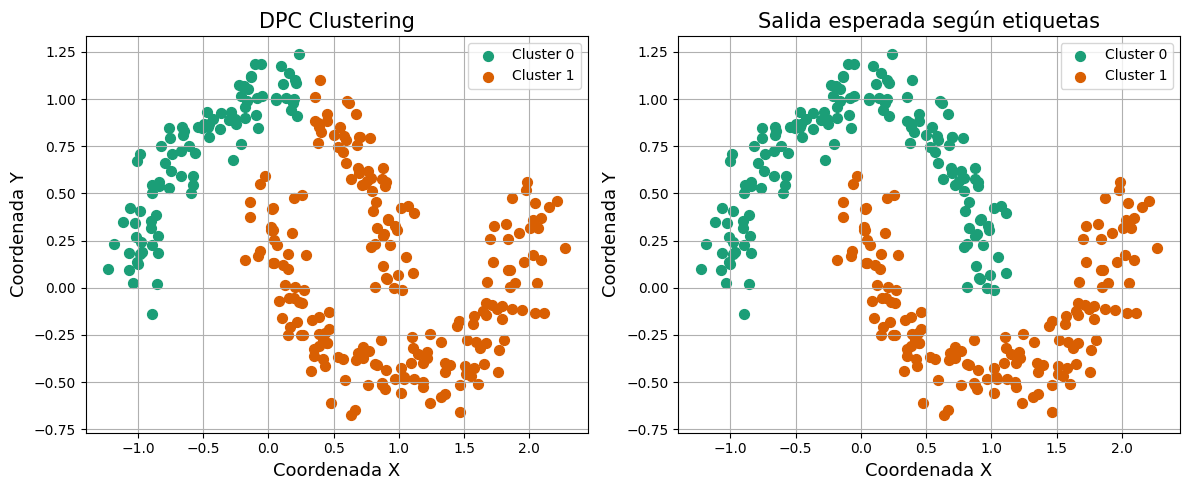

In [287]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = plt.colormaps['Dark2']
unique_labels = np.unique(labels)

# Gráfico 1. DPC
for i, label in enumerate(unique_labels):
    cluster_mask = (labels == label)
    ax1.scatter(dpc_numpy[cluster_mask, 0], dpc_numpy[cluster_mask, 1], color=colors(i), label=f'Cluster {label}', s=50)

ax1.set_title("DPC Clustering", fontsize=15)
ax1.set_xlabel('Coordenada X', fontsize=13)
ax1.set_ylabel('Coordenada Y', fontsize=13)
ax1.grid()
ax1.legend()

# Gráfico 2. Datos con etiquetas de cluster
# Obtener las etiquetas únicas de los clusters
unique_labels = set(df.Cluster)
df['Cluster'] = df['Cluster'].replace({0: 1, 1: 0})
# Bucle para asignar un color a cada cluster.
for i, label in enumerate(unique_labels):
    # True/False según si el valor en la columna 'Cluster' es igual o no al valor de 'label'
    cluster_mask = df.Cluster == label
    # Selecciona las filas donde el valor de 'Cluster' sea igual al de 'label' y lo representa del mismo color
    ax2.scatter(df.X1[cluster_mask], df.X2[cluster_mask], color=colors(i), label=f'Cluster {label}', s=50)

ax2.set_xlabel('Coordenada X', fontsize=13)
ax2.set_ylabel('Coordenada Y', fontsize=13)
ax2.set_title('Salida esperada según etiquetas', fontsize=15)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()